In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

2022-03-06 19:26:03.783797: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-06 19:26:03.783868: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

In [5]:
class_names[y_train[0]]

'Coat'

Epoch 1/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6335 - accuracy: 0.7733 - val_loss: 0.4205 - val_accuracy: 0.8506
Epoch 2/50
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4784 - accuracy: 0.8266 - val_loss: 0.3988 - val_accuracy: 0.8526
Epoch 3/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4389 - accuracy: 0.8405 - val_loss: 0.3759 - val_accuracy: 0.8606
Epoch 4/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4186 - accuracy: 0.8480 - val_loss: 0.3604 - val_accuracy: 0.8708
Epoch 5/50
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4006 - accuracy: 0.8546 - val_loss: 0.3448 - val_accuracy: 0.8724
Epoch 6/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3865 - accuracy: 0.8591 - val_loss: 0.3383 - val_accuracy: 0.8720
Epoch 7/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3755 - accuracy: 0.8627 - val_loss: 0.3352 - val_accuracy:

<AxesSubplot:>

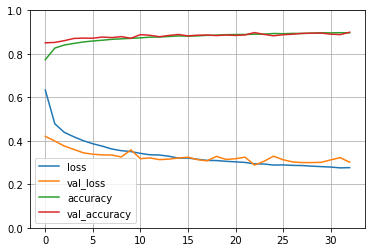

In [18]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=X_train_full.shape[1:]),
    keras.layers.Dense(100, activation='selu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(100, activation='selu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(100, activation='selu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax'),
])

callbacks = [
    keras.callbacks.EarlyStopping(
        patience=10,
        restore_best_weights=True,
    ),
]

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"],
)

history = model.fit(
    X_train,
    y_train,
    epochs=50,
    validation_data=(X_valid, y_valid),
    callbacks=callbacks,
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss', 'accuracy', 'val_accuracy']].plot(grid=True, ylim=(0.0, 1.0))

Epoch 1/50
1719/1719 [==============================] - 579s 336ms/step - loss: 0.4972 - accuracy: 0.8172 - val_loss: 0.2911 - val_accuracy: 0.8960
Epoch 2/50
1719/1719 [==============================] - 573s 333ms/step - loss: 0.3234 - accuracy: 0.8827 - val_loss: 0.2909 - val_accuracy: 0.8874
Epoch 3/50
1719/1719 [==============================] - 499s 290ms/step - loss: 0.2778 - accuracy: 0.8990 - val_loss: 0.2573 - val_accuracy: 0.9014
Epoch 4/50
1719/1719 [==============================] - 506s 294ms/step - loss: 0.2488 - accuracy: 0.9108 - val_loss: 0.2860 - val_accuracy: 0.8982
Epoch 5/50
1719/1719 [==============================] - 582s 338ms/step - loss: 0.2278 - accuracy: 0.9187 - val_loss: 0.2533 - val_accuracy: 0.9114
Epoch 6/50
1719/1719 [==============================] - 565s 329ms/step - loss: 0.2078 - accuracy: 0.9248 - val_loss: 0.2616 - val_accuracy: 0.9128
Epoch 7/50
1719/1719 [==============================] - 591s 344ms/step - loss: 0.1934 - accuracy: 0.9315 - val_

<AxesSubplot:>

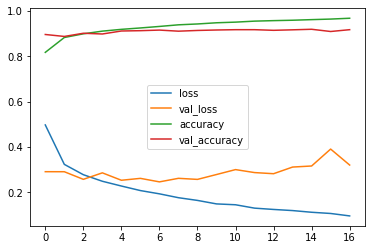

In [16]:
cnn_model = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation='relu', padding='same', input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(10, activation='softmax'),
])

callbacks = [
    keras.callbacks.EarlyStopping(
        patience=10,
        restore_best_weights=True,
    ),
]

cnn_model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"],
)

history = cnn_model.fit(
    X_train,
    y_train,
    epochs=50,
    validation_data=(X_valid, y_valid),
    callbacks=callbacks,
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss', 'accuracy', 'val_accuracy']].plot(grid=True, ylim=(0.0, 1.0))

In [8]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

def build_model(n_hidden=1, n_neurons=30, input_shape=X_train_full.shape[1:]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    model.add(keras.layers.Flatten())
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu'))
        model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Dense(10, activation='softmax'))
    model.compile(
        loss="sparse_categorical_crossentropy",
        optimizer="adam",
        metrics=["accuracy"],
    )
    return model

params = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
}

model_search_cv = RandomizedSearchCV(
    keras.wrappers.scikit_learn.KerasClassifier(build_model),
    params,
    n_iter=1,
    cv=3,
)
model_search_cv.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=callbacks)



/tmp/ipykernel_685940/1505965242.py:25: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras.wrappers.scikit_learn.KerasClassifier(build_model),


Epoch 1/100


2022-03-06 19:29:47.402463: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 114984576 exceeds 10% of free system memory.


1146/1146 [==============================] - 4s 3ms/step - loss: 1.2809 - accuracy: 0.5326 - val_loss: 0.6372 - val_accuracy: 0.7904
Epoch 2/100
1146/1146 [==============================] - 3s 3ms/step - loss: 0.8985 - accuracy: 0.6656 - val_loss: 0.5748 - val_accuracy: 0.8146
Epoch 3/100
1146/1146 [==============================] - 3s 3ms/step - loss: 0.8364 - accuracy: 0.6911 - val_loss: 0.5405 - val_accuracy: 0.8236
Epoch 4/100
1146/1146 [==============================] - 3s 3ms/step - loss: 0.7913 - accuracy: 0.7106 - val_loss: 0.5213 - val_accuracy: 0.8314
Epoch 5/100
1146/1146 [==============================] - 4s 3ms/step - loss: 0.7613 - accuracy: 0.7254 - val_loss: 0.5223 - val_accuracy: 0.8314
Epoch 6/100
1146/1146 [==============================] - 3s 3ms/step - loss: 0.7525 - accuracy: 0.7271 - val_loss: 0.5203 - val_accuracy: 0.8318
Epoch 7/100
1146/1146 [==============================] - 4s 3ms/step - loss: 0.7451 - accuracy: 0.7301 - val_loss: 0.5240 - val_accuracy: 0.82

2022-03-06 19:32:13.307233: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 114987712 exceeds 10% of free system memory.


1146/1146 [==============================] - 4s 3ms/step - loss: 1.4122 - accuracy: 0.4655 - val_loss: 0.8549 - val_accuracy: 0.6544
Epoch 2/100
1146/1146 [==============================] - 3s 3ms/step - loss: 1.0226 - accuracy: 0.6105 - val_loss: 0.7354 - val_accuracy: 0.7490
Epoch 3/100
1146/1146 [==============================] - 3s 3ms/step - loss: 0.9222 - accuracy: 0.6629 - val_loss: 0.6537 - val_accuracy: 0.7938
Epoch 4/100
1146/1146 [==============================] - 3s 3ms/step - loss: 0.8738 - accuracy: 0.6842 - val_loss: 0.6160 - val_accuracy: 0.8118
Epoch 5/100
1146/1146 [==============================] - 3s 3ms/step - loss: 0.8400 - accuracy: 0.6996 - val_loss: 0.5868 - val_accuracy: 0.8104
Epoch 6/100
1146/1146 [==============================] - 3s 3ms/step - loss: 0.8195 - accuracy: 0.7103 - val_loss: 0.6067 - val_accuracy: 0.8064
Epoch 7/100
1146/1146 [==============================] - 3s 3ms/step - loss: 0.7934 - accuracy: 0.7222 - val_loss: 0.5975 - val_accuracy: 0.80

2022-03-06 19:34:38.639762: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 114987712 exceeds 10% of free system memory.


1146/1146 [==============================] - 3s 3ms/step - loss: 1.3003 - accuracy: 0.5094 - val_loss: 0.6564 - val_accuracy: 0.7342
Epoch 2/100
1146/1146 [==============================] - 3s 2ms/step - loss: 0.8868 - accuracy: 0.6532 - val_loss: 0.5758 - val_accuracy: 0.7870
Epoch 3/100
1146/1146 [==============================] - 3s 3ms/step - loss: 0.8144 - accuracy: 0.6886 - val_loss: 0.5543 - val_accuracy: 0.8092
Epoch 4/100
1146/1146 [==============================] - 3s 3ms/step - loss: 0.7716 - accuracy: 0.7054 - val_loss: 0.5330 - val_accuracy: 0.8122
Epoch 5/100
1146/1146 [==============================] - 3s 3ms/step - loss: 0.7430 - accuracy: 0.7181 - val_loss: 0.5435 - val_accuracy: 0.8114
Epoch 6/100
1146/1146 [==============================] - 3s 3ms/step - loss: 0.7303 - accuracy: 0.7265 - val_loss: 0.5171 - val_accuracy: 0.8188
Epoch 7/100
1146/1146 [==============================] - 3s 3ms/step - loss: 0.7156 - accuracy: 0.7319 - val_loss: 0.5107 - val_accuracy: 0.82

2022-03-06 19:36:28.630167: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 172480000 exceeds 10% of free system memory.


1719/1719 [==============================] - 5s 2ms/step - loss: 1.1671 - accuracy: 0.5623 - val_loss: 0.5936 - val_accuracy: 0.7856
Epoch 2/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.8373 - accuracy: 0.6939 - val_loss: 0.5206 - val_accuracy: 0.8184
Epoch 3/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7678 - accuracy: 0.7202 - val_loss: 0.5077 - val_accuracy: 0.8216
Epoch 4/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7373 - accuracy: 0.7349 - val_loss: 0.4995 - val_accuracy: 0.8222
Epoch 5/100
1719/1719 [==============================] - 4s 3ms/step - loss: 0.7212 - accuracy: 0.7416 - val_loss: 0.4878 - val_accuracy: 0.8304
Epoch 6/100
1719/1719 [==============================] - 4s 3ms/step - loss: 0.7132 - accuracy: 0.7429 - val_loss: 0.4918 - val_accuracy: 0.8316
Epoch 7/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7075 - accuracy: 0.7461 - val_loss: 0.5009 - val_accuracy: 0.83

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f0ef040c460>,
                   n_iter=1,
                   param_distributions={'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [9]:
model_search_cv.best_params_

{'n_neurons': 16, 'n_hidden': 3}

In [10]:
model_search_cv.best_score_

0.8380908568700155